# Python Milestone - Customer Sentiment Analysis

In [31]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import nltk
from wordcloud import WordCloud


name = []
rating = []
review = []

In [32]:
# I was getting "Error: 403" so used this header as a bypass. 

HEADERS = {'User-Agent': 'Mozilla/5.0 (iPad; CPU OS 12_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148'}

url = """https://www.flipkart.com/apple-iphone-15-black-128-gb/product-reviews/itm6ac6485515ae4?pid=MOBGTAGPTB3VS24W&lid=LSTMOBGTAGPTB3VS24WKFODHL&marketplace=FLIPKART"""

# Using the for loop to scrape data from 35 pages
for i in range(1,35):
    np = url + "&page=" + str(i)
    r = requests.get(np, headers = HEADERS)
    soup = BeautifulSoup(r.text, "html.parser")
    
    names = soup.find_all("p", {"class": "_2NsDsF AwS1CA"}) # Scrapping for names of the customer
    for i in names:
        name.append(i.text)
 
    ratings = soup.find_all("div", {"class":"XQDdHH Ga3i8K"}) # Scrapping for ratings of the customer
    for i in ratings:
        rating.append(i.text)

    reveiws = soup.find_all("div", {"class": "ZmyHeo"}) # Scrapping for reviews of the customer
    for i in reveiws:
        review.append(i.text)
        
        
r

print(len(name),len(rating),len(review))

340 340 340


In [33]:
# While importing the scrapped data into the pandas DataFrame I got an error "ValueError: All arrays must be of the same length error you saw earlier.",
# So all the variables are converted to the same length. It ensures all three lists have exactly the same number of elements.

min_len = min(len(name), len(rating), len(review))
name = name[:min_len]
rating = rating[:min_len]
review = review[:min_len]

df = pd.DataFrame({"Names": name, "Ratings": rating, "Reviews": review})
df

,Names,Ratings,Reviews
0,Thakur Surya Pratap Singh,5,Awesome 😎READ MORE
1,bijaya mohanty,5,Just go for it.Amazing one.Beautiful camera wi...
2,Akshay Meena,5,"So beautiful, so elegant, just a vowww😍❤️READ ..."
3,Nikhil Kumar,5,Switch from OnePlus to iPhone I am stunned wit...
4,Ajin V,5,High quality camera😍READ MORE
...,...,...,...
335,Flipkart Customer,5,"BEST camera and performance,READ MORE"
336,Akshat Kumar Anshu,5,Absolutely Amazing!Premium matte body!READ MORE
337,Prisca Fernandes,5,Just wowBuy it nowREAD MORE
338,Ritesh Kumar,5,Best phone nice camera and performanceREAD MORE


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Names    340 non-null    object
 1   Ratings  340 non-null    object
 2   Reviews  340 non-null    object
dtypes: object(3)
memory usage: 8.1+ KB


In [35]:
# Converting the data type for "Ratings" to int for easier calculation
df["Ratings"] = df["Ratings"].astype(int)

# Converting the Names to correct format
df["Names"] = df["Names"].str.title()
df.head()

,Names,Ratings,Reviews
0,Thakur Surya Pratap Singh,5,Awesome 😎READ MORE
1,Bijaya Mohanty,5,Just go for it.Amazing one.Beautiful camera wi...
2,Akshay Meena,5,"So beautiful, so elegant, just a vowww😍❤️READ ..."
3,Nikhil Kumar,5,Switch from OnePlus to iPhone I am stunned wit...
4,Ajin V,5,High quality camera😍READ MORE


In [36]:
# Every review has a "READ MORE" for longer reviews we are removing that here for better results
df["Reviews"] = df["Reviews"].str.replace("READ MORE", "")

In [37]:
df.tail()

,Names,Ratings,Reviews
335,Flipkart Customer,5,"BEST camera and performance,"
336,Akshat Kumar Anshu,5,Absolutely Amazing!Premium matte body!
337,Prisca Fernandes,5,Just wowBuy it now
338,Ritesh Kumar,5,Best phone nice camera and performance
339,Flipkart Customer,5,Excellent


In [38]:
# Using polarity to check the sentiment of the review
def pol(value):
    a = TextBlob(value)
    return a.polarity

df["Polarity"] = df["Reviews"].apply(pol)
df

,Names,Ratings,Reviews,Polarity
0,Thakur Surya Pratap Singh,5,Awesome 😎,1.000000
1,Bijaya Mohanty,5,Just go for it.Amazing one.Beautiful camera wi...,0.266667
2,Akshay Meena,5,"So beautiful, so elegant, just a vowww😍❤️",0.675000
3,Nikhil Kumar,5,Switch from OnePlus to iPhone I am stunned wit...,1.000000
4,Ajin V,5,High quality camera😍,0.160000
...,...,...,...,...
335,Flipkart Customer,5,"BEST camera and performance,",1.000000
336,Akshat Kumar Anshu,5,Absolutely Amazing!Premium matte body!,0.250000
337,Prisca Fernandes,5,Just wowBuy it now,0.000000
338,Ritesh Kumar,5,Best phone nice camera and performance,0.800000


In [39]:
def pol(value):
    a = TextBlob(value)
    return a.polarity

df["Polarity"] = df["Reviews"].apply(pol)
df

,Names,Ratings,Reviews,Polarity
0,Thakur Surya Pratap Singh,5,Awesome 😎,1.000000
1,Bijaya Mohanty,5,Just go for it.Amazing one.Beautiful camera wi...,0.266667
2,Akshay Meena,5,"So beautiful, so elegant, just a vowww😍❤️",0.675000
3,Nikhil Kumar,5,Switch from OnePlus to iPhone I am stunned wit...,1.000000
4,Ajin V,5,High quality camera😍,0.160000
...,...,...,...,...
335,Flipkart Customer,5,"BEST camera and performance,",1.000000
336,Akshat Kumar Anshu,5,Absolutely Amazing!Premium matte body!,0.250000
337,Prisca Fernandes,5,Just wowBuy it now,0.000000
338,Ritesh Kumar,5,Best phone nice camera and performance,0.800000


In [40]:
# Using subjectivity to check how subjective is the review.
def sub(value):
    a = TextBlob(value)
    return a.subjectivity

df["Subjectivity"] = df["Reviews"].apply(sub)
df

,Names,Ratings,Reviews,Polarity,Subjectivity
0,Thakur Surya Pratap Singh,5,Awesome 😎,1.000000,1.000000
1,Bijaya Mohanty,5,Just go for it.Amazing one.Beautiful camera wi...,0.266667,0.633333
2,Akshay Meena,5,"So beautiful, so elegant, just a vowww😍❤️",0.675000,1.000000
3,Nikhil Kumar,5,Switch from OnePlus to iPhone I am stunned wit...,1.000000,1.000000
4,Ajin V,5,High quality camera😍,0.160000,0.540000
...,...,...,...,...,...
335,Flipkart Customer,5,"BEST camera and performance,",1.000000,0.300000
336,Akshat Kumar Anshu,5,Absolutely Amazing!Premium matte body!,0.250000,0.900000
337,Prisca Fernandes,5,Just wowBuy it now,0.000000,0.000000
338,Ritesh Kumar,5,Best phone nice camera and performance,0.800000,0.650000


In [41]:
df.describe()

,Ratings,Polarity,Subjectivity
count,340.000000,340.000000,340.000000
mean,4.835294,0.499469,0.623417
std,0.443825,0.315368,0.277584
min,3.000000,-0.303333,0.000000
25%,5.000000,0.264847,0.462153
50%,5.000000,0.500000,0.625000
75%,5.000000,0.700000,0.837500
max,5.000000,1.000000,1.000000


In [42]:
avg_pol = df["Polarity"].mean()

if avg_pol <= -0.3:
    print("Negative")
elif avg_pol >= 0.3:
    print("positive")
else:
    print("Neutral")

print("The average polarity is", avg_pol)

positive
The average polarity is 0.49946885794550455


In [43]:
# The avg_polarity is around 0.52

In [44]:
# I have filtered out data for polarity less than 0.4 and found that the comments are not very negative hence I have divided the sentiment into 3 parts
# Neutral (score < 0.4), Positive (score >= 0.6) and rest are mixed.

def classify_sentiment(score):
    if score <= 0.4:
        return "Neutral"
    elif score >= 0.6:
        return "Positive"
    else:
        return "Mixed"  # or "Neutral", depending on your preference

df["Sentiment"] = df["Polarity"].apply(classify_sentiment)
df

,Names,Ratings,Reviews,Polarity,Subjectivity,Sentiment
0,Thakur Surya Pratap Singh,5,Awesome 😎,1.000000,1.000000,Positive
1,Bijaya Mohanty,5,Just go for it.Amazing one.Beautiful camera wi...,0.266667,0.633333,Neutral
2,Akshay Meena,5,"So beautiful, so elegant, just a vowww😍❤️",0.675000,1.000000,Positive
3,Nikhil Kumar,5,Switch from OnePlus to iPhone I am stunned wit...,1.000000,1.000000,Positive
4,Ajin V,5,High quality camera😍,0.160000,0.540000,Neutral
...,...,...,...,...,...,...
335,Flipkart Customer,5,"BEST camera and performance,",1.000000,0.300000,Positive
336,Akshat Kumar Anshu,5,Absolutely Amazing!Premium matte body!,0.250000,0.900000,Neutral
337,Prisca Fernandes,5,Just wowBuy it now,0.000000,0.000000,Neutral
338,Ritesh Kumar,5,Best phone nice camera and performance,0.800000,0.650000,Positive


In [45]:
sentiment_counts = df["Sentiment"].value_counts()
sentiment_counts

Sentiment
Positive    146
Neutral     133
Mixed        61
Name: count, dtype: int64

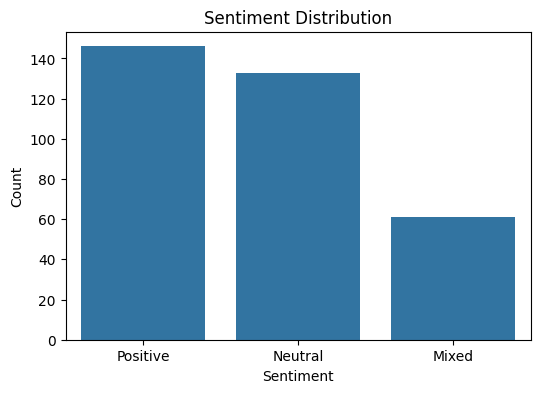

In [46]:
plt.figure(figsize=(6,4))
sns.countplot(x="Sentiment", data=df)

plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [47]:
# We can see through this bar chat the overall sentiment is positive for this product

## Sentiment Distribution: Calculate the overall distribution of positive and negative sentiments for the 300 reviews.


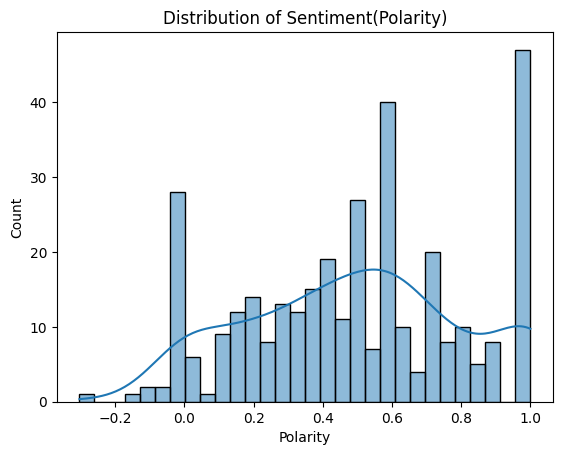

In [48]:
# Sentiment Distribution: Calculate the overall distribution of positive and negative sentiments for the 300 reviews.

sns.histplot(df["Polarity"], kde = True, bins = 30)
plt.title("Distribution of Sentiment(Polarity)")
plt.show()

In [49]:
# Average Rating vs Sentiment: Analyze if there is any correlation between the numeric ratings (1-5 stars) and sentiment polarity. Do higher ratings correspond with more positive sentiments?

avg_rating = df["Ratings"].mean()
avg_rating

np.float64(4.8352941176470585)

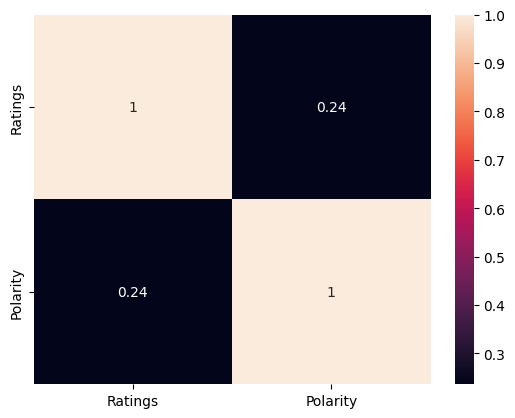

In [50]:
cols = ["Ratings", "Polarity"]

sns.heatmap(data = df[cols].corr(), annot = True, cmap = "rocket")
plt.show()

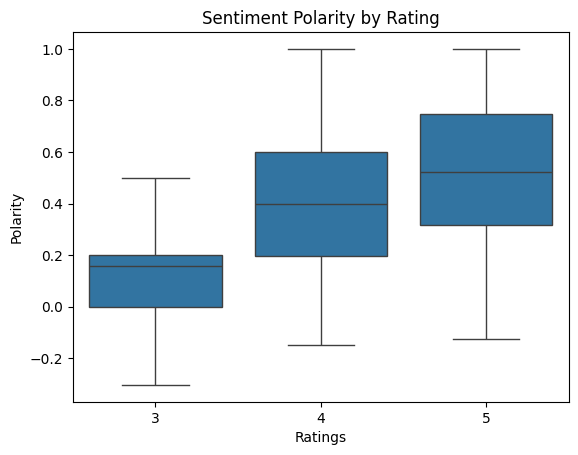

In [51]:
sns.boxplot(x="Ratings", y="Polarity", data=df)
plt.title("Sentiment Polarity by Rating")
plt.show()

In [52]:
# Here we can see positive sentiment (polarity > 0.3) increases with higher ratings have more positive sentiment towards the product.

## Word Cloud: Create a word cloud to identify the most frequently mentioned words in the positive and negative reviews.


In [53]:
# Separate positive and negative reviews
positive_reviews = " ".join(df[df["Polarity"] > 0]["Reviews"].astype(str))
negative_reviews = " ".join(df[df["Polarity"] < 0]["Reviews"].astype(str))


In [54]:
# Generating Positive WordCloud
pos_wc = WordCloud(width = 800, height = 400, background_color = "white", colormap = "Greens").generate(positive_reviews)

# Generate Negative WordCloud
neg_wc = WordCloud(width = 800, height = 400, background_color = "white", colormap = "Reds").generate(negative_reviews)

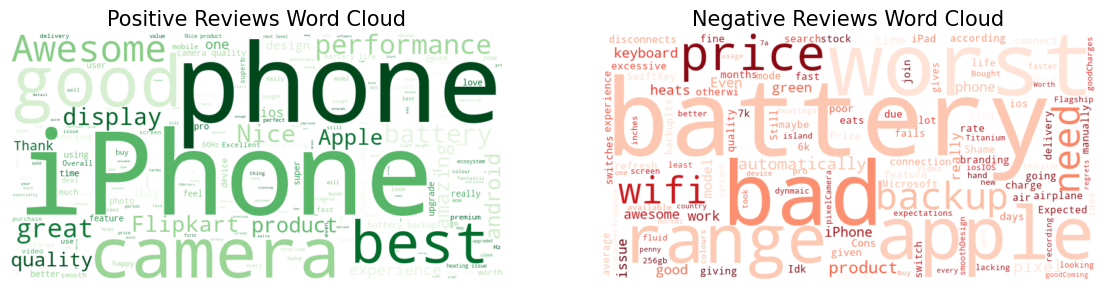

In [55]:
# plotting the word cloud
plt.figure(figsize = (14,6))

# Positive word cloud
plt.subplot(1, 2, 1)
plt.imshow(pos_wc, interpolation = "bilinear")
plt.axis("off")
plt.title("Positive Reviews Word Cloud", fontsize = 15)

# Negative word cloud
plt.subplot(1, 2, 2)
plt.imshow(neg_wc, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Reviews Word Cloud", fontsize=15)

plt.show()

## Review Length Analysis: Investigate if longer reviews are associated with more detailed sentiments, either positive or negative.

In [56]:
# Calculating Length for each review - Here the the length for the review is count by per word in it.
df["Review_Length"] = df["Reviews"].astype(str).apply(lambda x: len(x.split()))
df["Review_Length"]

0       2
1      10
2       7
3      17
4       3
       ..
335     4
336     4
337     4
338     6
339     1
Name: Review_Length, Length: 340, dtype: int64

In [57]:
# Checking for correlations of "Reviews" and "Polarity"
corr = df["Review_Length"].corr(df["Polarity"])
corr

np.float64(-0.3681528379341142)

In [58]:
# The corr is -0.35. Hence we can say that as the length of the review increases polarity decreases or 
# we can also say that the reviews are neutral in nature 

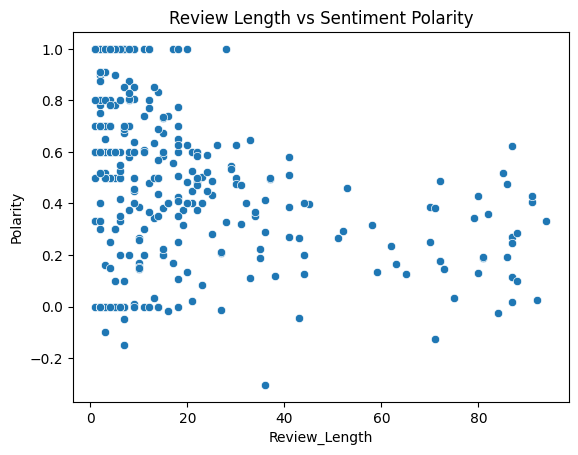

In [59]:
sns.scatterplot(x = "Review_Length", y = "Polarity", data = df)
plt.title("Review Length vs Sentiment Polarity")
plt.show()

In [60]:
# In the graph we can see that as the length of the review increases the polarity does not increase and it stays consistent.

# Key Findings

## 1. Sentiment Distribution
The average polarity across all reviews is approximately 0.52, indicating that customers generally express a positive sentiment towards the product.

Reviews were segmented into three categories based on polarity:

- Neutral: Score < 0.4

- Positive: Score ≥ 0.6

- Mixed: Between 0.4 and 0.6

The majority of reviews fall under the positive category, as visualized in the bar chart, reinforcing an overall favorable perception of the product


## 2. Ratings vs Sentiment

- An upward trend is observed where higher star ratings correspond to higher sentiment polarity.

- Customers who gave higher ratings tend to express more positive sentiment, validating the reliability of sentiment analysis in capturing customer satisfaction.

## 3. Review Length vs Sentiment

- The correlation between review length and polarity was found to be -0.35.

- This suggests that as the length of reviews increases, polarity tends to decrease slightly, indicating longer reviews are often more balanced or neutral in tone.

- Graphical analysis confirms that sentiment remains consistent across varying review lengths and does not necessarily become more positive with more detailed feedback.

## Insights for Action

- The predominance of positive sentiment highlights strong customer approval of the product.

- Neutral and mixed reviews, although fewer, may provide constructive feedback for improvement.

- Since longer reviews are more balanced, businesses should consider analyzing them carefully to uncover nuanced feedback that short, highly positive reviews may overlook.
